# Proyecto Bootcamp IA

## Análisis exploratorio de la Data

## 1. Objetivo General 
Comprender el perfil antropométrico y de condición física de los(as) estudiantes, así como las diferencias por sexo, deporte e institución (IED), para orientar decisiones de entrenamiento, detección de talentos y planeación escolar/deportiva.

## 2. Objetivos específicos 

1. Entregar visualizaciones claras (tablas, histogramas, boxplots, barras, correlaciones) y recomendaciones accionables.

2. Cuantificar nulos, duplicados y valores atípicos; dejar el dataset listo para análisis/reporte.
   
3. Describir la distribución de variables clave (edad, peso, talla, envergadura, pruebas de campo).

4. Comparar promedios y variaciones por Sexo, Deporte e Institución.

5. Relacionar medidas antropométricas y de desempeño (p. ej., talla vs. peso, envergadura vs. talla, Leger vs. velocidad).

5. Derivar indicadores (IMC, razón envergadura/talla, percentiles por edad/sexo).

7. Responder preguntas operativas (¿en qué deportes hay mejores tiempos/promedios?) que requieren filtrar datos de forma precisa.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

1. Abrir el DataSet de excel y volverlo un DataFrame (Visualización de los datos)
2. Hacer el tratamiento de los valores nulos (Limpieza de datos)
3. Mostrar por pantalla el deporte que más practican los estudiantes (ambos sexos)
4. Mostrar por pantalla la institución educativa con el mayor y menor numero de estudiantes
   que practican deportes
5. Seleccionar en el primer cuartil de las estudiantes (mujeres) que practican tenis de mesa en la prueba
   de balón medicinal. Es decir, que tienen los resultados mas bajos

## 1. Visualización de los datos

Versión de Python: 3.13.2

In [3]:
datos = pd.read_excel("datos.xlsx")
datos.head()

,Institución Educativa Distrital -IED,Deporte,Sexo,Edad (años cumplidos),Peso (kg),Talla (cm),Talla Sentado (cm),Envergadura (cm),Balón Medicinal,Salto Largo,10 x 5 (s),30 m lanzados (s),Wells,Leger,Velocidad Máxima (Course Navette - km h^-1)
0,COL CLEMENCIA DE CAYCEDO (IED),AJEDREZ,Mujer,12,40.0,148.0,77.0,149.0,305.0,113.0,19.5,7.0,30.0,3.0,9.5
1,COL CLEMENCIA DE CAYCEDO (IED),AJEDREZ,Mujer,12,53.0,158.0,82.0,158.0,400.0,142.0,17.8,6.2,18.0,NaN,NaN
2,COL CLEMENCIA DE CAYCEDO (IED),AJEDREZ,Mujer,12,46.0,156.0,80.0,153.0,310.0,145.0,19.3,6.5,29.0,3.0,9.5
3,COL CLEMENCIA DE CAYCEDO (IED),AJEDREZ,Mujer,12,53.0,147.0,77.0,146.0,335.0,129.0,19.7,7.1,22.0,3.0,9.5
4,COL CLEMENCIA DE CAYCEDO (IED),AJEDREZ,Mujer,12,51.0,158.0,83.0,157.0,360.0,148.0,17.2,6.2,22.0,3.0,9.5


In [4]:
# Imprimir las columnas 
datos.columns

Index(['Institución Educativa Distrital -IED', 'Deporte', 'Sexo',
       'Edad (años cumplidos)', 'Peso (kg)', 'Talla (cm)',
       'Talla Sentado (cm)', 'Envergadura (cm)', 'Balón Medicinal',
       'Salto Largo', '10 x 5 (s)', '30 m lanzados (s)', 'Wells', 'Leger',
       'Velocidad Máxima (Course Navette - km h^-1)'],
      dtype='object')

In [5]:
# Verificar número de filas y columnas 
print("Dimensiones del DataFrame",datos.shape)

Dimensiones del DataFrame (2491, 15)


## 2. Limpieza de datos 

In [6]:
# Visualización de la cantidad de valores nulos por columnas 
print(datos.isnull().sum())

Institución Educativa Distrital -IED            0
Deporte                                         0
Sexo                                            0
Edad (años cumplidos)                           0
Peso (kg)                                       0
Talla (cm)                                      0
Talla Sentado (cm)                              0
Envergadura (cm)                                0
Balón Medicinal                                 0
Salto Largo                                     0
10 x 5 (s)                                      0
30 m lanzados (s)                               0
Wells                                           0
Leger                                          58
Velocidad Máxima (Course Navette - km h^-1)    85
dtype: int64


In [7]:
# Generación de una copia para hacer la limpieza de datos
df_copy = datos.copy()
df_copy.head()

,Institución Educativa Distrital -IED,Deporte,Sexo,Edad (años cumplidos),Peso (kg),Talla (cm),Talla Sentado (cm),Envergadura (cm),Balón Medicinal,Salto Largo,10 x 5 (s),30 m lanzados (s),Wells,Leger,Velocidad Máxima (Course Navette - km h^-1)
0,COL CLEMENCIA DE CAYCEDO (IED),AJEDREZ,Mujer,12,40.0,148.0,77.0,149.0,305.0,113.0,19.5,7.0,30.0,3.0,9.5
1,COL CLEMENCIA DE CAYCEDO (IED),AJEDREZ,Mujer,12,53.0,158.0,82.0,158.0,400.0,142.0,17.8,6.2,18.0,NaN,NaN
2,COL CLEMENCIA DE CAYCEDO (IED),AJEDREZ,Mujer,12,46.0,156.0,80.0,153.0,310.0,145.0,19.3,6.5,29.0,3.0,9.5
3,COL CLEMENCIA DE CAYCEDO (IED),AJEDREZ,Mujer,12,53.0,147.0,77.0,146.0,335.0,129.0,19.7,7.1,22.0,3.0,9.5
4,COL CLEMENCIA DE CAYCEDO (IED),AJEDREZ,Mujer,12,51.0,158.0,83.0,157.0,360.0,148.0,17.2,6.2,22.0,3.0,9.5


In [8]:
# LLenar los datos nulos de la columna Leger con la media de los datos 
if "Leger" in df_copy.columns:
   df_copy["Leger"].fillna(df_copy["Leger"].mean(), inplace=True)
print(df_copy.isnull().sum())

Institución Educativa Distrital -IED            0
Deporte                                         0
Sexo                                            0
Edad (años cumplidos)                           0
Peso (kg)                                       0
Talla (cm)                                      0
Talla Sentado (cm)                              0
Envergadura (cm)                                0
Balón Medicinal                                 0
Salto Largo                                     0
10 x 5 (s)                                      0
30 m lanzados (s)                               0
Wells                                           0
Leger                                           0
Velocidad Máxima (Course Navette - km h^-1)    85
dtype: int64


C:\Users\juans\AppData\Local\Temp\ipykernel_2648\669511405.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy["Leger"].fillna(df_copy["Leger"].mean(), inplace=True)


In [9]:
# LLenar los valores nulos de la columna Valocidad Máxima con la media de los datos 
if "Velocidad Máxima (Course Navette - km h^-1)" in df_copy.columns:
    df_copy["Velocidad Máxima (Course Navette - km h^-1)"].fillna(df_copy["Velocidad Máxima (Course Navette - km h^-1)"].mean(), inplace=True)
print(df_copy.isnull().sum())

Institución Educativa Distrital -IED           0
Deporte                                        0
Sexo                                           0
Edad (años cumplidos)                          0
Peso (kg)                                      0
Talla (cm)                                     0
Talla Sentado (cm)                             0
Envergadura (cm)                               0
Balón Medicinal                                0
Salto Largo                                    0
10 x 5 (s)                                     0
30 m lanzados (s)                              0
Wells                                          0
Leger                                          0
Velocidad Máxima (Course Navette - km h^-1)    0
dtype: int64


C:\Users\juans\AppData\Local\Temp\ipykernel_2648\522461577.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy["Velocidad Máxima (Course Navette - km h^-1)"].fillna(df_copy["Velocidad Máxima (Course Navette - km h^-1)"].mean(), inplace=True)


## 3. Deporte que más práctican los estudiantes 

In [10]:
deporte_mas_practicado = df_copy["Deporte"].mode()[0]
print( "El deporte más practicado es:",deporte_mas_practicado)

El deporte más practicado es: FUTBOL


## 4. Instiución educativa con mayor y menor número de estudiantes que practican deportes

In [11]:
colegio_moda = df_copy["Institución Educativa Distrital -IED"].value_counts()
colegio_moda

Institución Educativa Distrital -IED
COMUNIDAD1                                   271
COL TOMAS CARRASQUILLA (IED)                 139
COL COLOMBIA VIVA (IED)                      126
COL FEDERICO GARCIA LORCA (IED)              103
COL MANUELA BELTRAN (IED)                     99
                                            ... 
COL RUR JOSE CELESTINO MUTIS (IED)             4
COL NUEVA ESPERANZA (IED)                      3
COL INST TEC DISTRITAL JULIO FLOREZ (IED)      3
COL MANUEL ELKIN PATARROYO (IED)               2
COL RAFAEL BERNAL JIMENEZ (IED)                2
Name: count, Length: 62, dtype: int64

In [12]:
print(f"El colegio con mayor número de estudiantes inscritos en las pruebas físicas es: {colegio_moda.index[0]} con {colegio_moda.iloc[0]} estudiantes") 
print(f"El colegio con menor número de estudiantes inscritos en las pruebas físicas es: {colegio_moda.index[-1]} con {colegio_moda.iloc[-1]} estudiantes") 

El colegio con mayor número de estudiantes inscritos en las pruebas físicas es: COMUNIDAD1 con 271 estudiantes
El colegio con menor número de estudiantes inscritos en las pruebas físicas es: COL RAFAEL BERNAL JIMENEZ (IED) con 2 estudiantes


## 5. Diagrama de barras que representa la cantidad de estudiantes por deporte  

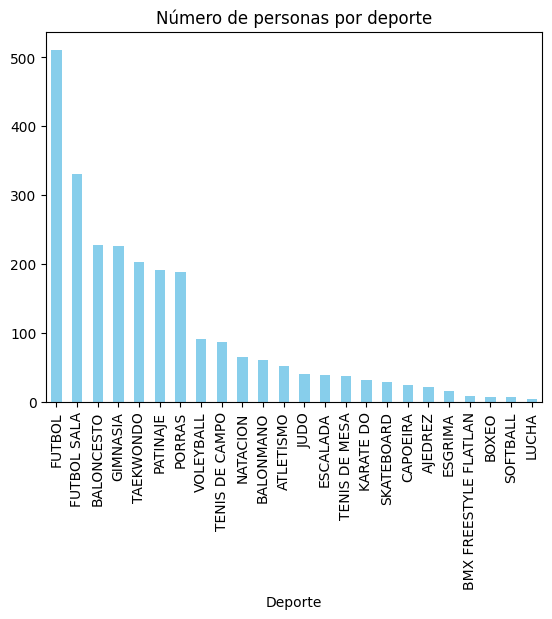

In [13]:
df_copy.Deporte.value_counts().plot(kind="bar", title="Número de personas por deporte", color = "skyblue")
plt.show()

## 6. Diagrama circular que representa la cantidad de personas que practican deporte por sexo 

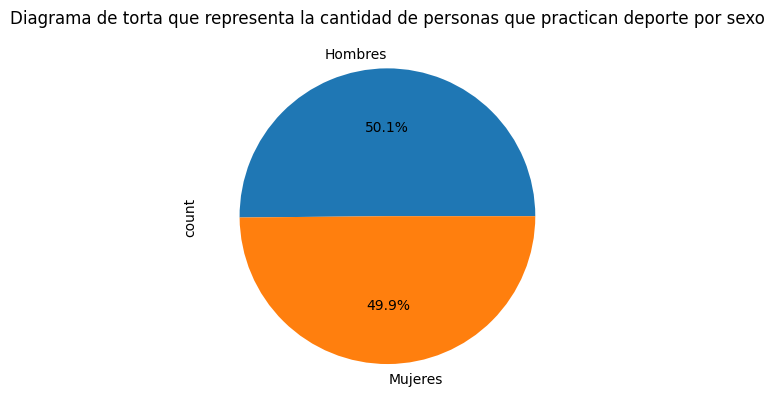

In [14]:
plt.figure()
df_copy.Sexo.value_counts().plot(kind="pie", labels= ["Hombres", "Mujeres"],
                                 title= "Diagrama de torta que representa la cantidad de personas que practican deporte por sexo",
                                 autopct= "%1.1f%%")
plt.show()

## 7. Diagrama de correlación 

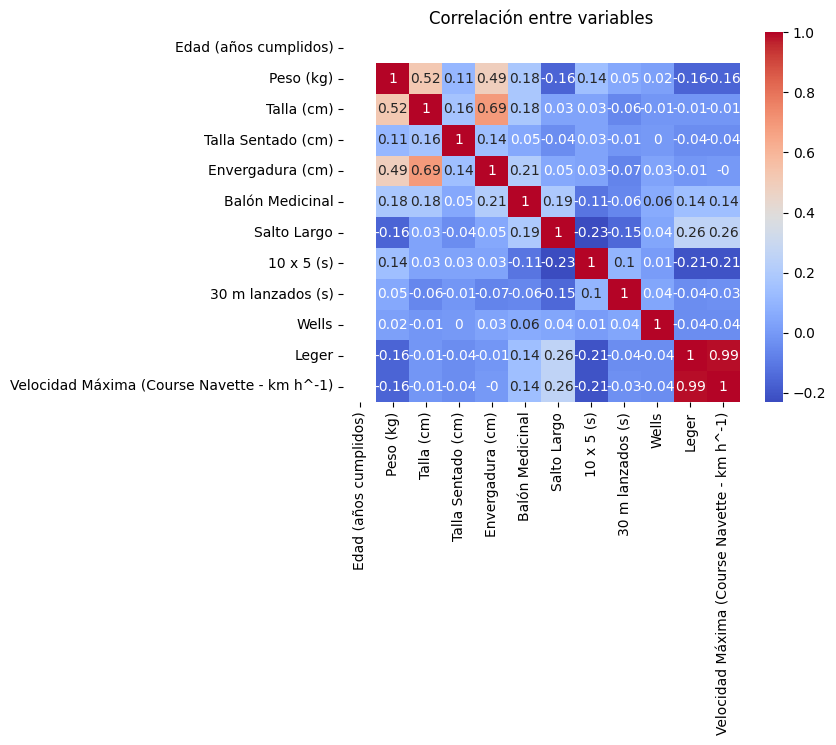

In [15]:
df_numericos = df_copy.select_dtypes(include="number")
correlacion_matriz = df_numericos.corr().round(2)
sns.heatmap(correlacion_matriz, annot=True, cmap="coolwarm")
plt.title("Correlación entre variables")
plt.show()
    

## 8. Cambiar el nombre de la columna velocidad máxima 


In [16]:
df_copy = df_copy.rename(columns={"Velocidad Máxima (Course Navette - km h^-1)": "Velocidad Máxima"})
print(df_copy.columns)

Index(['Institución Educativa Distrital -IED', 'Deporte', 'Sexo',
       'Edad (años cumplidos)', 'Peso (kg)', 'Talla (cm)',
       'Talla Sentado (cm)', 'Envergadura (cm)', 'Balón Medicinal',
       'Salto Largo', '10 x 5 (s)', '30 m lanzados (s)', 'Wells', 'Leger',
       'Velocidad Máxima'],
      dtype='object')


## 9. Estadísticas descriptivas 

In [17]:
df_copy.describe()

,Edad (años cumplidos),Peso (kg),Talla (cm),Talla Sentado (cm),Envergadura (cm),Balón Medicinal,Salto Largo,10 x 5 (s),30 m lanzados (s),Wells,Leger,Velocidad Máxima
count,2491.0,2491.000000,2491.000000,2491.000000,2491.000000,2491.000000,2491.000000,2491.000000,2491.000000,2491.000000,2491.000000,2491.000000
mean,12.0,41.960169,148.723244,78.124785,149.474067,322.791088,139.160859,21.692198,5.929916,20.992701,4.023222,10.013716
std,0.0,7.271014,6.965763,10.795773,8.079095,71.655069,21.679729,3.313163,1.442906,6.880460,1.706653,0.844673
min,12.0,28.500000,130.000000,60.000000,127.000000,150.000000,89.000000,15.800000,4.290000,4.000000,0.000000,8.500000
25%,12.0,36.400000,144.000000,73.000000,144.000000,274.500000,123.000000,19.400000,5.180000,16.000000,3.000000,9.500000
50%,12.0,41.000000,149.000000,76.000000,150.000000,320.000000,139.000000,21.100000,5.650000,21.000000,4.000000,10.000000
75%,12.0,46.700000,154.000000,80.000000,155.000000,370.000000,152.000000,23.120000,6.270000,26.000000,5.000000,10.500000
max,12.0,63.400000,165.000000,126.400000,169.000000,533.000000,210.000000,39.300000,19.200000,37.000000,12.000000,14.000000


## 10. Crear una nueva columna que indique el índice de masa corporal (IMC)

In [18]:
altura_metros = df_copy["Talla (cm)"] /100
df_copy["IMC"] = df_copy["Peso (kg)"] / (altura_metros **2)
display(df_copy["IMC"])

0       18.261505
1       21.230572
2       18.902038
3       24.526818
4       20.429418
          ...    
2486    19.477147
2487    20.342798
2488    22.212967
2489    16.419591
2490    16.196955
Name: IMC, Length: 2491, dtype: float64

## 11. Seccionar por Cuartiles a las mujeres que practican tenis de mesa en la prueba de balón medicinal y pertenecen al primer cuartil. (Las que peores resultados obtuvieron)

In [19]:
#Filtrar a las mujeres que practican Tenis de mesa
filtrado = df_copy[(df_copy.Sexo == "Mujer") & (df_copy.Deporte == "TENIS DE MESA")]
filtrado.head()

,Institución Educativa Distrital -IED,Deporte,Sexo,Edad (años cumplidos),Peso (kg),Talla (cm),Talla Sentado (cm),Envergadura (cm),Balón Medicinal,Salto Largo,10 x 5 (s),30 m lanzados (s),Wells,Leger,Velocidad Máxima,IMC
2365,COL ANTONIO BARAYA (IED),TENIS DE MESA,Mujer,12,33.6,136.0,71.0,137.0,308.0,101.0,20.56,5.60,11.0,3.0,9.5,18.166090
2367,COL ANTONIO BARAYA (IED),TENIS DE MESA,Mujer,12,36.7,142.0,80.1,149.0,270.0,182.0,19.49,7.29,22.0,2.0,9.0,18.200754
2370,COL ANTONIO BARAYA (IED),TENIS DE MESA,Mujer,12,35.0,143.0,66.0,140.0,391.0,125.0,20.18,5.28,14.0,4.0,10.0,17.115751
2371,COL ANTONIO NARI√ëO (IED),TENIS DE MESA,Mujer,12,48.9,142.0,75.7,144.0,266.0,125.0,24.93,7.29,18.0,1.0,8.5,24.251141
2374,COL ANTONIO NARI√ëO (IED),TENIS DE MESA,Mujer,12,36.3,149.0,77.2,151.0,352.0,160.0,21.15,5.39,22.0,5.0,10.5,16.350615


In [20]:
# Seleccionar de los filtrados, las mujeres que realizaron la prueba de balón medicinal 
# y contar las mujeres del primer cuartil (las que peores resultados tuvieron)

q1 = filtrado["Balón Medicinal"].quantile(0.25)
print(q1)
conteo = filtrado["Balón Medicinal"] <= q1
result_suma = conteo.sum()
print("Las mujeres pertenecientes al primer cuartil de los resultados en la prueba del balón medicinal son:",result_suma)

268.0
Las mujeres pertenecientes al primer cuartil de los resultados en la prueba del balón medicinal son: 5


## 12. ¿Cuál es el deporte con el promedio de altura más alta?

In [21]:

deporte_mas_promedio_altura = df_copy.groupby("Deporte")["Talla (cm)"].mean().idxmax()
print("El deporte con más promedio de altura es:", deporte_mas_promedio_altura)

El deporte con más promedio de altura es: AJEDREZ


## Filtrar a los estudiantes que practican futbol de la comunidad1


In [29]:
df_filtrado = df_copy[(df_copy["Institución Educativa Distrital -IED"] == "COMUNIDAD1") & (df_copy["Deporte"] == "FUTBOL")]
df_filtrado

,Institución Educativa Distrital -IED,Deporte,Sexo,Edad (años cumplidos),Peso (kg),Talla (cm),Talla Sentado (cm),Envergadura (cm),Balón Medicinal,Salto Largo,10 x 5 (s),30 m lanzados (s),Wells,Leger,Velocidad Máxima,IMC
922,COMUNIDAD1,FUTBOL,Hombre,12,38.9,140.0,70.0,138.0,230.0,165.0,22.00,5.63,8.0,4.0,10.0,19.846939
923,COMUNIDAD1,FUTBOL,Hombre,12,39.1,148.0,75.0,151.0,373.0,186.0,22.77,5.63,23.0,6.0,11.0,17.850621
924,COMUNIDAD1,FUTBOL,Hombre,12,32.7,140.0,71.0,140.0,390.0,197.0,19.78,5.09,29.0,7.0,11.5,16.683673
925,COMUNIDAD1,FUTBOL,Hombre,12,36.4,145.0,75.0,141.0,270.0,175.0,19.56,5.60,18.0,3.0,9.5,17.312723
926,COMUNIDAD1,FUTBOL,Hombre,12,47.0,139.0,73.0,145.0,340.0,130.0,21.13,5.84,27.0,4.0,10.0,24.325863
927,COMUNIDAD1,FUTBOL,Hombre,12,44.4,155.0,76.0,163.0,382.0,166.0,20.40,5.34,24.0,6.0,11.0,18.480749
928,COMUNIDAD1,FUTBOL,Hombre,12,40.0,153.0,78.0,150.0,310.0,137.0,19.22,5.12,25.0,3.0,9.5,17.087445
929,COMUNIDAD1,FUTBOL,Hombre,12,35.4,144.0,72.0,143.0,290.0,120.0,20.78,5.22,13.0,4.0,10.0,17.071759
930,COMUNIDAD1,FUTBOL,Hombre,12,54.0,150.0,79.0,151.0,430.0,120.0,20.34,5.15,18.0,2.0,9.0,24.000000
931,COMUNIDAD1,FUTBOL,Hombre,12,36.7,146.0,72.0,148.0,320.0,112.0,19.60,5.86,19.0,3.0,9.5,17.217114
